## 모멘텀 (Momentum) 옵티마이저

모멘텀은 경사 하강법에 물리 법칙의 **관성(inertia)** 개념을 도입한 최적화 알고리즘이다. 이전 업데이트의 방향과 크기를 기억하는 '속도(velocity)' 변수를 추가하여, 현재 기울기 방향과 합쳐 파라미터를 업데이트한다. 이 방식은 SGD의 불안정한 업데이트 경로를 완화하고, 최적점으로 더 빠르고 부드럽게 수렴하도록 돕는다.

### 1. 기본 설정
예시에 필요한 `numpy`와 시각화를 위한 `matplotlib` 라이브러리를 임포트.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 예시 데이터 준비
다른 옵티마이저 예제와 일관성을 유지하기 위해, 동일한 선형 관계(`y = 2x + 1`)를 갖는 데이터를 생성. 이를 통해 각 옵티마이저의 성능을 비교하기 용이.

In [2]:
# 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1) # y = 1 + 2x + noise

# 데이터 확인 (첫 5개)
print("X (입력) 샘플:\n", X[:5])
print("y (정답) 샘플:\n", y[:5])

X (입력) 샘플:
 [[0.37024137]
 [1.64831329]
 [0.46124434]
 [1.12252651]
 [0.4212788 ]]
y (정답) 샘플:
 [[1.96784753]
 [3.36229294]
 [0.31422351]
 [3.98448041]
 [2.74823062]]


### 3. 모멘텀 구현 및 모델 학습

모멘텀 알고리즘을 단계별로 구현하여 모델의 최적 파라미터(`w`, `b`)를 찾아가는 과정.

1. `w`, `b`를 임의의 값으로 초기화하고, **속도(velocity) 변수 `v_w`, `v_b`를 0으로 초기화**하는 것이 핵심.
2. 각 epoch마다 데이터 순서를 섞음 (미니배치 또는 SGD 기반).
3. 각 데이터 샘플(또는 미니배치)에 대해 기울기를 계산.
4. **모멘텀 업데이트**: 이전 속도에 모멘텀 계수를 곱하고, 현재 기울기를 반영하여 새로운 속도를 계산.
   - `velocity = momentum * velocity - learning_rate * gradient`
5. **파라미터 업데이트**: 계산된 최종 속도만큼 파라미터를 이동.
   - `parameter = parameter + velocity`

In [3]:
# 하이퍼파라미터 설정
learning_rate = 0.01
n_epochs = 50
momentum = 0.9  # 모멘텀 계수 (일반적으로 0.9가 많이 사용됨)

# 모델 파라미터(가중치, 편향) 초기화
w = np.random.randn(1, 1)
b = np.random.randn(1, 1)

# 속도(velocity) 변수 초기화 (모멘텀의 핵심)
v_w = np.zeros_like(w)
v_b = np.zeros_like(b)

# 데이터 개수
m = len(X)

print(f"초기 가중치 w: {w[0][0]:.4f}, 초기 편향 b: {b[0][0]:.4f}")

# 학습 과정 (SGD 기반으로 설명)
for epoch in range(n_epochs):
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    for i in range(m):
        xi = X_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        
        # 예측 및 오차 계산
        y_pred = np.dot(xi, w) + b
        error = y_pred - yi
        
        # 기울기 계산
        gradient_w = 2 * xi.T.dot(error)
        gradient_b = 2 * np.sum(error)
        
        # 속도(velocity) 업데이트 (관성 적용)
        v_w = momentum * v_w - learning_rate * gradient_w
        v_b = momentum * v_b - learning_rate * gradient_b
        
        # 파라미터 업데이트 (속도만큼 이동)
        w += v_w
        b += v_b
        
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:2d}: w = {w[0][0]:.4f}, b = {b[0][0]:.4f}")

초기 가중치 w: 0.0127, 초기 편향 b: 0.5306
Epoch 10: w = 1.8491, b = 1.1213
Epoch 20: w = 1.6212, b = 1.0414
Epoch 30: w = 2.4292, b = 1.3196
Epoch 40: w = 2.0242, b = 1.0366
Epoch 50: w = 2.0283, b = 0.2930


### 4. 학습 결과 확인

학습 완료 후의 최종 `w`와 `b`를 확인하여 실제 값(`w=2`, `b=1`)에 얼마나 근사하는지 비교. SGD보다 안정적으로 수렴하는 경향을 보임.

In [4]:
print("===== 학습 완료 ====")
print(f"최종 가중치 w: {w[0][0]:.4f}")
print(f"최종 편향 b: {b[0][0]:.4f}")
print("실제 값: w=2, b=1")

===== 학습 완료 ====
최종 가중치 w: 2.0283
최종 편향 b: 0.2930
실제 값: w=2, b=1


### 5. 학습된 모델 시각화

원본 데이터(산점도)와 모멘텀을 통해 학습된 선형 회귀 직선을 함께 시각화하여 결과 확인.

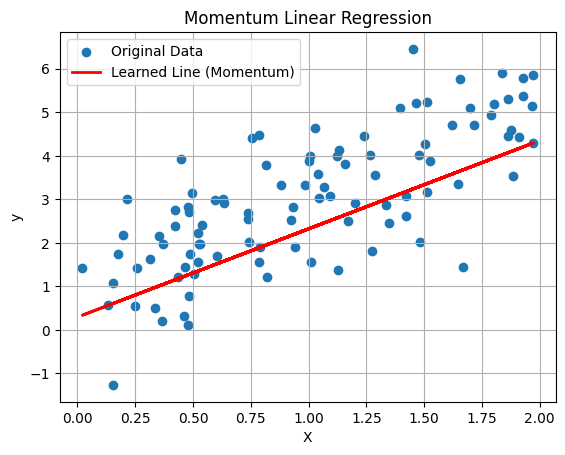

In [5]:
# 산점도로 원본 데이터 시각화
plt.scatter(X, y, label='Original Data')

# 학습된 선형 회귀선 시각화
y_pred_line = w * X + b
plt.plot(X, y_pred_line, color='red', linewidth=2, label='Learned Line (Momentum)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Momentum Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

### 6. 결론 및 요약

- **SGD와의 차이점**: 모멘텀은 파라미터 업데이트 시, 현재 기울기뿐만 아니라 과거의 이동 방향(속도)을 함께 고려한다. 이로 인해 SGD의 단점인 심한 진동을 줄이고 수렴 속도를 높인다.
- **장점**: 빠른 수렴 속도, 안정적인 업데이트 경로, 지역 최솟값 탈출 가능성 증가.
- **고려사항**: `momentum`이라는 또 하나의 하이퍼파라미터가 추가되어 튜닝이 필요하다. (일반적으로 0.9가 좋은 시작점으로 알려져 있다.)

### 한 문장 요약

모멘텀은 이전 업데이트의 이동 방향을 관성처럼 사용하여, 현재 업데이트의 방향과 속도를 조절함으로써 더 빠르고 안정적으로 최적점을 찾아가는 알고리즘이다.